In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y Dataset')

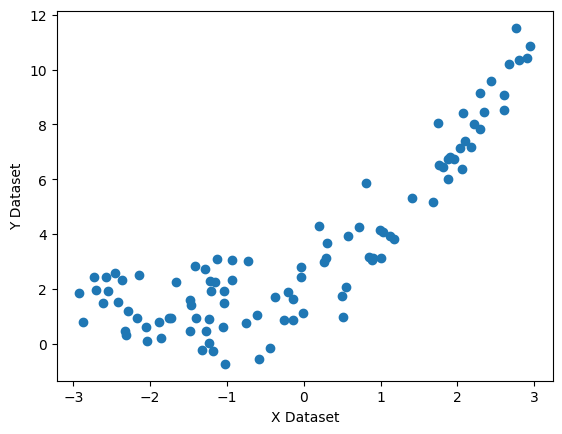

In [6]:
x = 6*np.random.rand(100,1)-3
y = 0.5*x**2+1.5*x+2+np.random.randn(100,1)
## y = ax**2+bx+c+ ouliers
plt.scatter(x,y)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()

In [11]:
regression1.fit(x_train,y_train)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression1.predict(x_test))
print(score)

0.7505184613154062


Text(0, 0.5, 'Y Dataset')

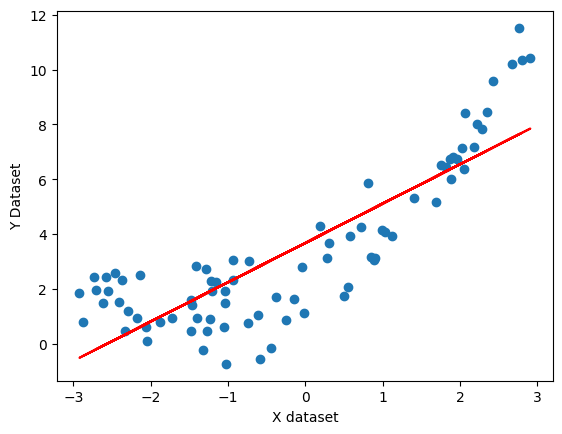

In [15]:
plt.plot(x_train,regression1.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("Y Dataset")

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_poly = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [20]:
x_poly

array([[ 1.00000000e+00, -1.88378262e+00,  3.54863697e+00],
       [ 1.00000000e+00, -7.46313616e-01,  5.56984013e-01],
       [ 1.00000000e+00, -7.26592216e-01,  5.27936248e-01],
       [ 1.00000000e+00,  1.87928626e+00,  3.53171686e+00],
       [ 1.00000000e+00, -2.87498472e+00,  8.26553716e+00],
       [ 1.00000000e+00,  5.47787648e-01,  3.00071307e-01],
       [ 1.00000000e+00, -2.36842579e+00,  5.60944073e+00],
       [ 1.00000000e+00, -2.04605129e+00,  4.18632589e+00],
       [ 1.00000000e+00,  2.79841785e+00,  7.83114247e+00],
       [ 1.00000000e+00,  1.12627204e+00,  1.26848872e+00],
       [ 1.00000000e+00,  8.98920433e-01,  8.08057944e-01],
       [ 1.00000000e+00,  9.98291728e-01,  9.96586373e-01],
       [ 1.00000000e+00, -1.26661950e+00,  1.60432496e+00],
       [ 1.00000000e+00, -2.41478596e+00,  5.83119125e+00],
       [ 1.00000000e+00, -1.46661346e+00,  2.15095504e+00],
       [ 1.00000000e+00,  1.96076269e+00,  3.84459033e+00],
       [ 1.00000000e+00, -2.92024943e+00

In [21]:
x_poly_test

array([[ 1.00000000e+00, -1.75683369e+00,  3.08646461e+00],
       [ 1.00000000e+00,  1.74971521e+00,  3.06150332e+00],
       [ 1.00000000e+00, -2.11299196e-01,  4.46473504e-02],
       [ 1.00000000e+00,  2.61220418e+00,  6.82361069e+00],
       [ 1.00000000e+00, -2.31318120e+00,  5.35080727e+00],
       [ 1.00000000e+00,  2.95025199e+00,  8.70398681e+00],
       [ 1.00000000e+00,  2.58817064e-01,  6.69862729e-02],
       [ 1.00000000e+00,  2.60502286e+00,  6.78614410e+00],
       [ 1.00000000e+00,  1.16930770e+00,  1.36728049e+00],
       [ 1.00000000e+00, -1.86285567e+00,  3.47023125e+00],
       [ 1.00000000e+00,  5.15313259e-01,  2.65547755e-01],
       [ 1.00000000e+00, -1.23255409e+00,  1.51918959e+00],
       [ 1.00000000e+00, -1.65924327e+00,  2.75308824e+00],
       [ 1.00000000e+00, -1.42318219e-01,  2.02544755e-02],
       [ 1.00000000e+00,  1.00499537e+00,  1.01001570e+00],
       [ 1.00000000e+00, -1.18327497e+00,  1.40013966e+00],
       [ 1.00000000e+00,  2.10118279e+00

In [22]:
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(x_poly,y_train)
y_pred = reg.predict(x_poly_test)
score = r2_score(y_test,y_pred)
print(score)

0.9078110365117787


In [23]:
print(reg.coef_)

[[0.         1.47359623 0.51066574]]


In [24]:
print(reg.intercept_)

[2.17136113]


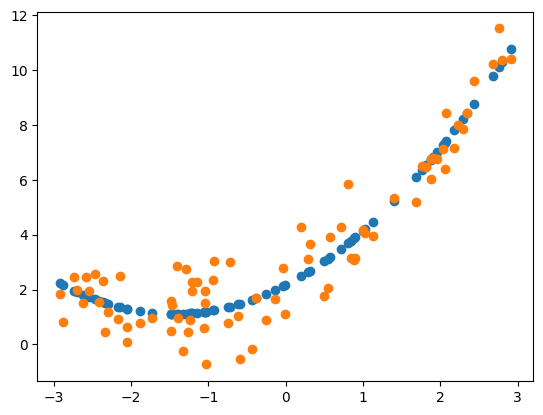

In [26]:
plt.scatter(x_train,reg.predict(x_poly))
plt.scatter(x_train,y_train)

In [27]:
from sklearn.pipeline import Pipeline

In [46]:
def poly_regression(degree):
  x_new = np.linspace(-3, 3, 200).reshape(200,1)
  poly_features = PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg = LinearRegression()
  poly_regression = Pipeline([
      ("poly_features",poly_features),
      ("lin_reg",lin_reg)
  ])
  poly_regression.fit(x_train,y_train)
  y_pred = poly_regression.predict(x_new)
  #plotting Prediction Line
  plt.plot(x_new,y_pred,'r',label="Degree" + str(degree),linewidth =3)
  plt.plot(x_train, y_train, "b.", linewidth=3)
  plt.plot(x_test, y_test,"g.",linewidth=3)
  plt.legend(loc="upper left")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.axis([-4,4,0,10])
  plt.show()

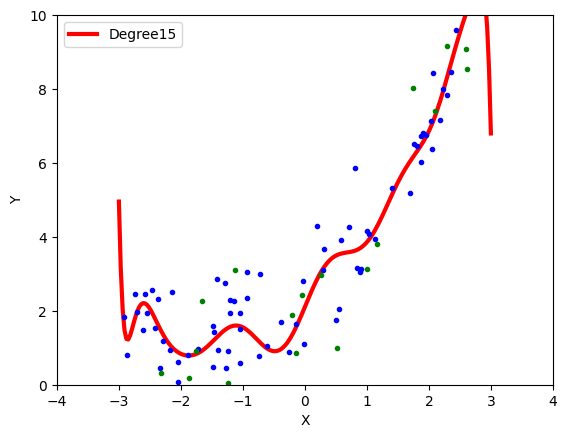

In [55]:
poly_regression(15)